In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

from xgboost import XGBClassifier
from sklearn import svm
RANDOM_STATE = 1
np.random.seed(RANDOM_STATE)

# Prepare Dataset for Baseline ML Model

In [2]:
# df = pd.read_csv('../../data/curated/reviews/yiting_cleaned_reviews.csv', parse_dates = ['Time'])
df = pd.read_csv('yiting_cleaned_reviews.csv')

In [3]:
x_train, x_test, y_train, y_test = train_test_split(df['processed_text'], df['Sentiment'], test_size = 0.2, random_state=4211, stratify = df['Sentiment'])

In [4]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, sublinear_tf=True)
train_vectors = tfidf_vectorizer.fit_transform(x_train)
test_vectors = tfidf_vectorizer.transform(x_test)

In [5]:
print(train_vectors.shape)
print(test_vectors.shape)

(4355, 9200)
(1089, 9200)


## SVM

In [6]:
np.random.seed(RANDOM_STATE)
svm_linear_classifier = svm.LinearSVC(random_state = RANDOM_STATE)
svm_linear_classifier.fit(train_vectors, y_train)
svm_prediction = svm_linear_classifier.predict(test_vectors)

In [7]:
svm_report = classification_report(y_test, svm_prediction, output_dict=True)
print('positive: ', svm_report['1'])
print('negative: ', svm_report['0'])
print('accuracy: ', svm_report['accuracy'])

positive:  {'precision': 0.9145907473309609, 'recall': 0.956575682382134, 'f1-score': 0.9351121892055791, 'support': 806}
negative:  {'precision': 0.8577235772357723, 'recall': 0.7455830388692579, 'f1-score': 0.7977315689981095, 'support': 283}
accuracy:  0.9017447199265382


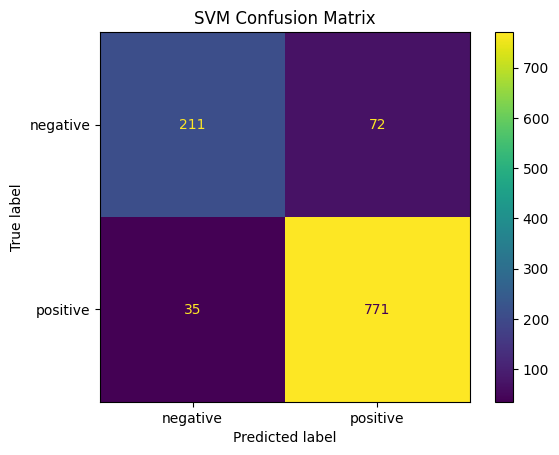

In [8]:
svm_cm = confusion_matrix(y_test, svm_prediction)
svm_cm_display = ConfusionMatrixDisplay(confusion_matrix = svm_cm, display_labels = ['negative', 'positive'])
svm_cm_display.plot()
plt.title('SVM Confusion Matrix')
plt.show()

## XGBoost

In [9]:
np.random.seed(RANDOM_STATE)
xgb_classifier = XGBClassifier(random_state = RANDOM_STATE)
xgb_classifier.fit(train_vectors, y_train)
xgb_prediction = xgb_classifier.predict(test_vectors)

In [10]:
xgb_report = classification_report(y_test, xgb_prediction, output_dict=True)
print('positive: ', xgb_report['1'])
print('negative: ', xgb_report['0'])
print('accuracy: ', xgb_report['accuracy'])

positive:  {'precision': 0.8859138533178114, 'recall': 0.9441687344913151, 'f1-score': 0.914114114114114, 'support': 806}
negative:  {'precision': 0.8043478260869565, 'recall': 0.6537102473498233, 'f1-score': 0.7212475633528265, 'support': 283}
accuracy:  0.8686868686868687


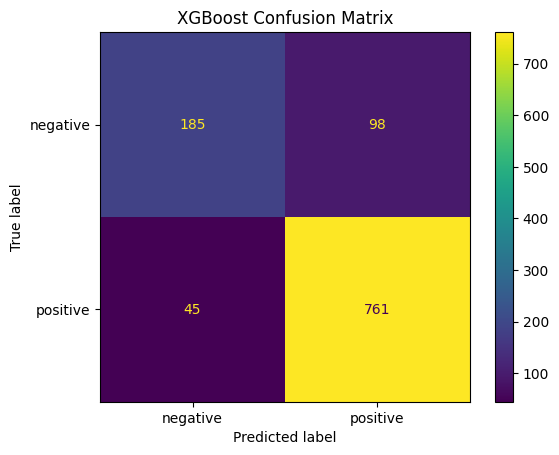

In [11]:
xgb_cm = confusion_matrix(y_test, xgb_prediction)
xgb_cm_display = ConfusionMatrixDisplay(confusion_matrix = xgb_cm, display_labels = ['negative', 'positive'])
xgb_cm_display.plot()
plt.title('XGBoost Confusion Matrix')
plt.show()

## Create Functions

In [ ]:
def get_svm():
    # load model
    
    # do prediction
    
    # output accuracy

In [ ]:
def get_xgb():
    # load model
    
    # do prediction
    
    # output accuracy